In [39]:
#Peder Hetland Flaat

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Faste parameterverdier brukt i oppgaven
GAMMA = 0.1      # recovery-rate γ
N = 1000         # befolkningsstørrelse
I0 = 1           # initialt antall smittede

def sir_dynamics(t, y, beta, gamma, phi, T_v):
    # Right-hand side for SIR-modellen med vaksinasjon.

    # Parameters
    
    # t : Tid (dager).
    # y : [S, I, R] ved tid t.
    # beta: Smitte-rate β.
    # gamma: Recovery-rate γ.
    # phi: Vaksinasjonsrate φ (andel av S vaksinert per dag).
    # T_v: Starttidspunkt for vaksinasjon.
   
    S, I, R = y
    N = S + I + R

    # Heaviside-funksjon: 0 før T_v, 1 etterpå
    H = 1.0 if t >= T_v else 0.0

    dS_dt = -beta * I * S / N - phi * S * H
    dI_dt =  beta * I * S / N - gamma * I
    dR_dt =  gamma * I + phi * S * H

    return [dS_dt, dI_dt, dR_dt]


In [ ]:
def sir_model(t_max, N, I_0, beta, gamma, phi=0.0, T_v=0.0):
    # Løs SIR-modellen numerisk frem til t_max (i dager).

    R0 = 0.0
    S0 = N - I_0
    y0 = [S0, I_0, R0]

    t_eval = np.arange(0, t_max + 1)  # én verdi per dag

    sol = solve_ivp(
        sir_dynamics,
        t_span=(0, t_max),
        y0=y0,
        t_eval=t_eval,
        args=(beta, gamma, phi, T_v),
        dense_output=False
    )
    y = sol.y.T
    return t_eval, y



In [ ]:
def sir_model_and_plot(t_max, N, I_0, beta, gamma, phi=0.0, T_v=0.0):
    # Løs modellen og plott S, I og R som funksjon av tid.
    t, y = sir_model(t_max, N, I_0, beta, gamma, phi, T_v)
    S, I, R = y[:, 0], y[:, 1], y[:, 2]

    plt.figure(figsize=(8, 4))
    plt.plot(t, S, label="S(t) - Susceptible")
    plt.plot(t, I, label="I(t) - Infectious")
    plt.plot(t, R, label="R(t) - Recovered")

    plt.xlabel("Tid t [dager]")
    plt.ylabel("Antall personer")
    plt.title(f"SIR-modell, β={beta:.3f}, φ={phi:.3f}, T_v={T_v}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return t, y


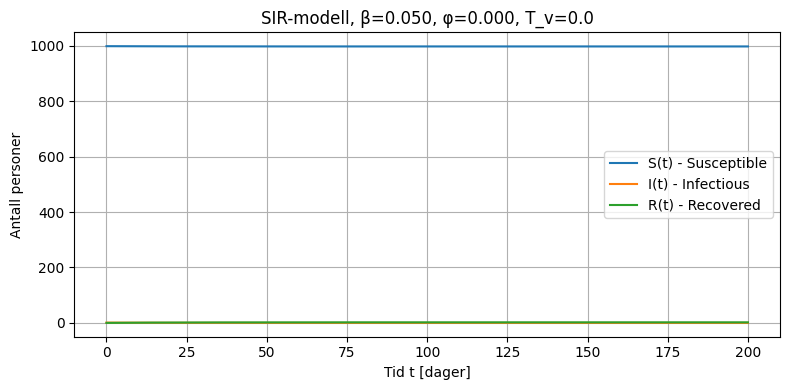

β = 0.05: I_max = 1.0


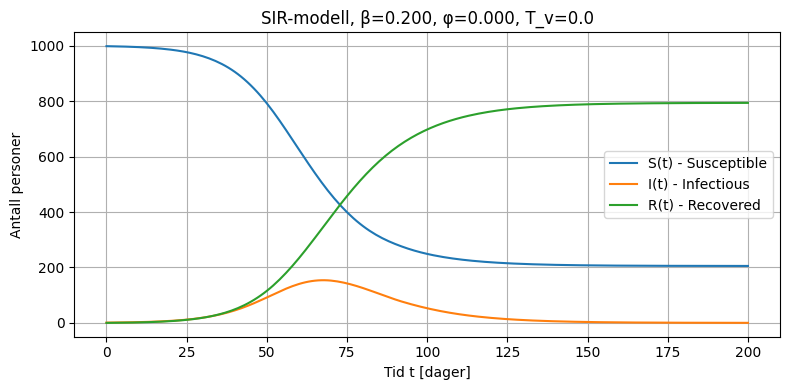

β = 0.20: I_max = 154.0


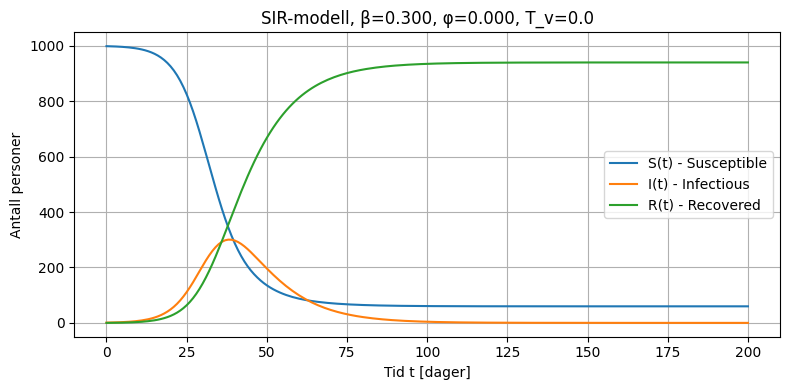

β = 0.30: I_max = 300.6


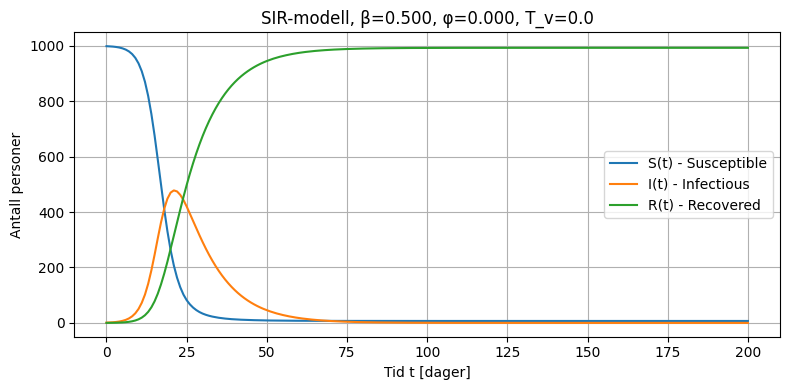

β = 0.50: I_max = 478.3


In [42]:
betas = [0.05, 0.2, 0.3, 0.5]   # verdier i [0.01, 1]
t_max = 200

for beta in betas:
    t, y = sir_model_and_plot(
        t_max=t_max,
        N=N,
        I_0=I0,
        beta=beta,
        gamma=GAMMA,
        phi=0.0,
        T_v=0.0
    )
    I = y[:, 1]
    print(f"β = {beta:.2f}: I_max = {I.max():.1f}")




Beta = 0.3, Phi = 0.005, T_v = 10


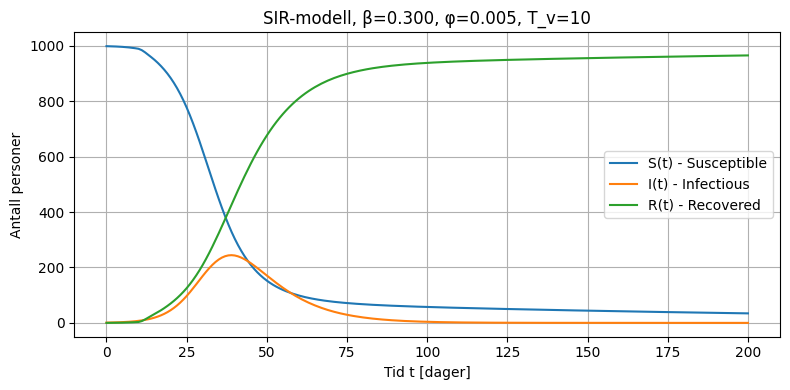

I_max = 244.5

Beta = 0.3, Phi = 0.01, T_v = 10


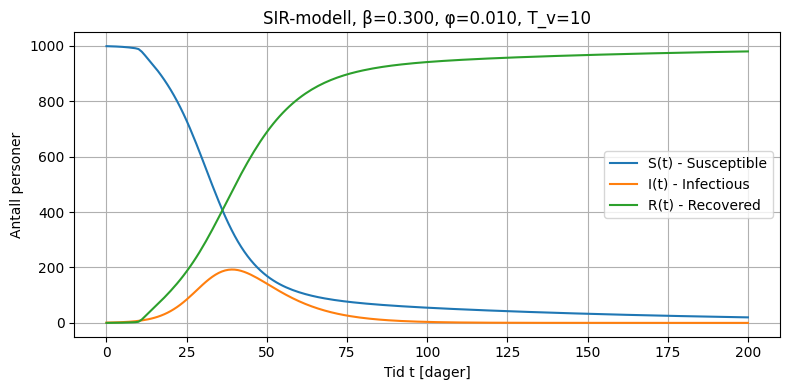

I_max = 192.7

Beta = 0.3, Phi = 0.02, T_v = 10


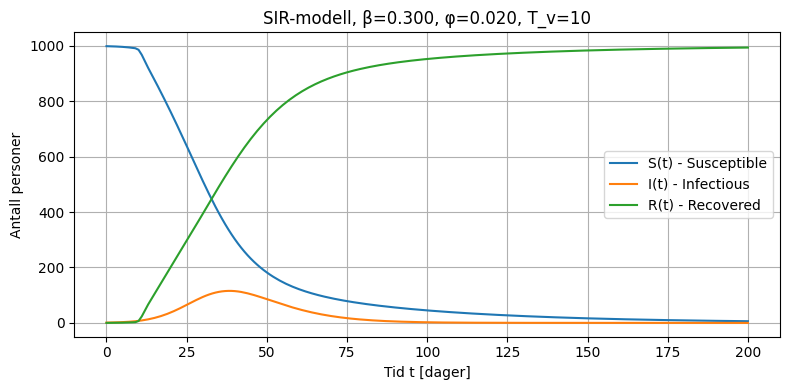

I_max = 115.5


In [43]:
beta = 0.3
T_v = 10
phis = [0.005, 0.01, 0.02]
t_max = 200

for phi in phis:
    print(f"\nBeta = {beta}, Phi = {phi}, T_v = {T_v}")
    t, y = sir_model_and_plot(
        t_max=t_max,
        N=N,
        I_0=I0,
        beta=beta,
        gamma=GAMMA,
        phi=phi,
        T_v=T_v
    )
    I = y[:, 1]
    print(f"I_max = {I.max():.1f}")



β = 0.3, φ = 0.01, T_v = 0


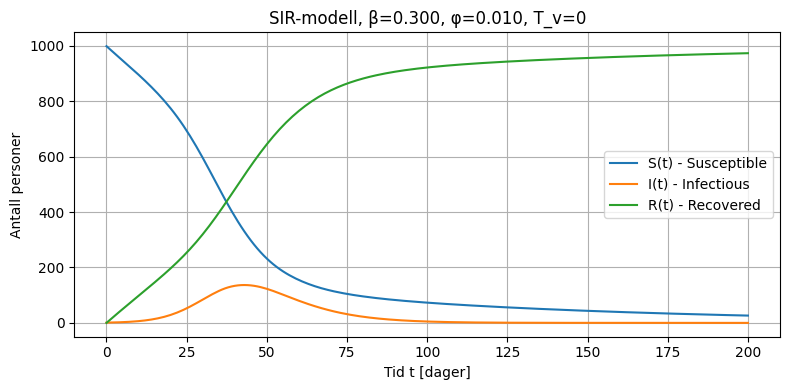

I_max = 136.7

β = 0.3, φ = 0.01, T_v = 10


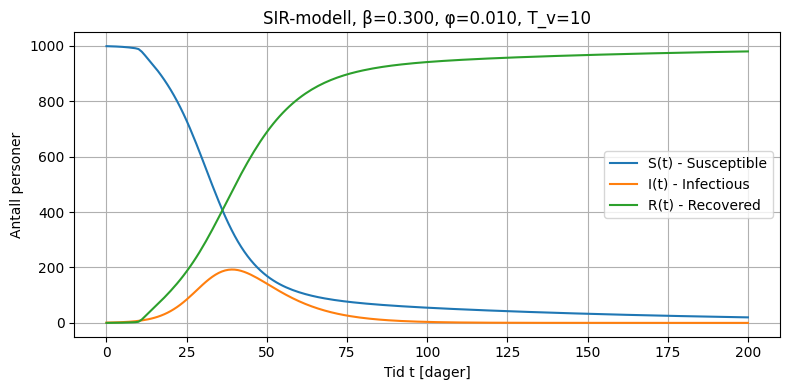

I_max = 192.7

β = 0.3, φ = 0.01, T_v = 20


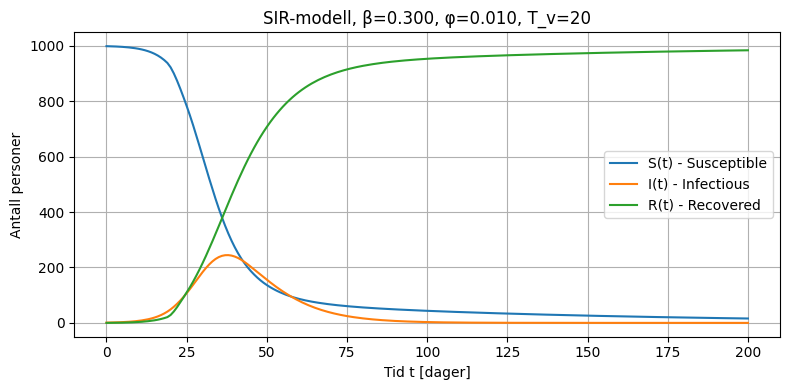

I_max = 244.6


In [44]:
beta = 0.3
phi = 0.01
T_vs = [0, 10, 20]
t_max = 200

for T_v in T_vs:
    print(f"\nβ = {beta}, φ = {phi}, T_v = {T_v}")
    t, y = sir_model_and_plot(
        t_max=t_max,
        N=N,
        I_0=I0,
        beta=beta,
        gamma=GAMMA,
        phi=phi,
        T_v=T_v
    )
    I = y[:, 1]
    print(f"I_max = {I.max():.1f}")


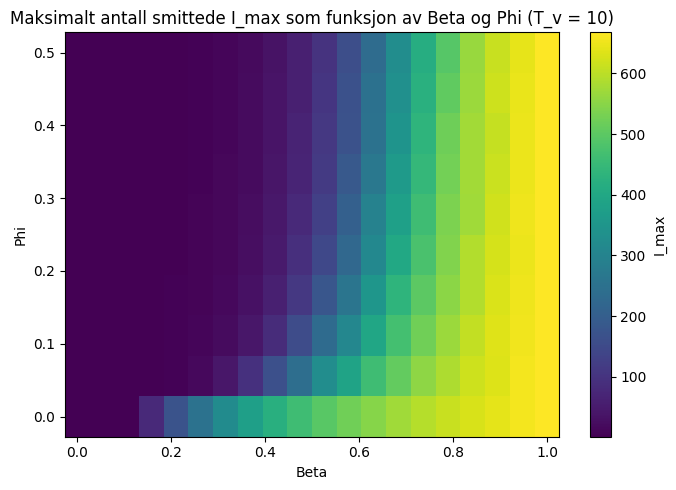

In [45]:
beta_values = np.linspace(0.0, 1.0, 20)      # 20 verdier for Beta
phi_values = np.linspace(0.0, 0.5, 10)       # 10 verdier for Phi
T_v = 10
t_max = 200

Imax = np.zeros((len(phi_values), len(beta_values)))

for i, phi in enumerate(phi_values):
    for j, beta in enumerate(beta_values):
        t, y = sir_model(
            t_max=t_max,
            N=N,
            I_0=I0,
            beta=beta,
            gamma=GAMMA,
            phi=phi,
            T_v=T_v
        )
        I = y[:, 1]
        Imax[i, j] = I.max()

# Lag rutenett for plotting
BETA, PHI = np.meshgrid(beta_values, phi_values)

plt.figure(figsize=(7, 5))
pcm = plt.pcolormesh(BETA, PHI, Imax, shading="auto")
plt.colorbar(pcm, label="I_max")
plt.xlabel("Beta")
plt.ylabel("Phi")
plt.title(f"Maksimalt antall smittede I_max som funksjon av Beta og Phi (T_v = {T_v})")
plt.tight_layout()
plt.show()
